In [1]:
# DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#SK Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [3]:
from sqlalchemy import create_engine
import pymysql

In [4]:
# reading df as csv with csv file
# reading header names as main header instead of the Xs
credit = pd.read_csv('credit_one.csv', header=1)
credit

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30198,30199,29996,220000,male,high school,1,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30199,30200,29997,150000,male,high school,2,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30200,30201,29998,30000,male,university,2,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30201,30202,29999,80000,male,high school,1,41,1,-1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [5]:
# showing value types prior data clean up
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30203 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30203 non-null  int64 
 1   ID                          30202 non-null  object
 2   LIMIT_BAL                   30203 non-null  object
 3   SEX                         30203 non-null  object
 4   EDUCATION                   30203 non-null  object
 5   MARRIAGE                    30203 non-null  object
 6   AGE                         30203 non-null  object
 7   PAY_0                       30203 non-null  object
 8   PAY_2                       30203 non-null  object
 9   PAY_3                       30203 non-null  object
 10  PAY_4                       30203 non-null  object
 11  PAY_5                       30203 non-null  object
 12  PAY_6                       30203 non-null  object
 13  BILL_AMT1                   30203 non-null  ob

In [6]:
# HTML EDA
# pandas_profiling.ProfileReport(credit)

In [7]:
# show main info on data set
# currently only reading column 0 which must be an error since data is not cleaned yet
credit.describe()

,0
count,30203.000000
mean,15102.000000
std,8718.999427
min,1.000000
25%,7551.500000
50%,15102.000000
75%,22652.500000
max,30203.000000


In [8]:
# one duplicate dropped
credit = credit.drop_duplicates()
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30203 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30203 non-null  int64 
 1   ID                          30202 non-null  object
 2   LIMIT_BAL                   30203 non-null  object
 3   SEX                         30203 non-null  object
 4   EDUCATION                   30203 non-null  object
 5   MARRIAGE                    30203 non-null  object
 6   AGE                         30203 non-null  object
 7   PAY_0                       30203 non-null  object
 8   PAY_2                       30203 non-null  object
 9   PAY_3                       30203 non-null  object
 10  PAY_4                       30203 non-null  object
 11  PAY_5                       30203 non-null  object
 12  PAY_6                       30203 non-null  object
 13  BILL_AMT1                   30203 non-null  ob

In [9]:
# visualizing rows/data to be deleted 201 & 202
print(credit.loc[199:208, :])

       0   ID  LIMIT_BAL     SEX        EDUCATION  MARRIAGE  AGE  PAY_0  \
199  200  200      30000  female      high school         2   22      1   
200  201  201     180000  female  graduate school         1   38     -2   
201  202  NaN         X1      X2               X3        X4   X5     X6   
202  203   ID  LIMIT_BAL     SEX        EDUCATION  MARRIAGE  AGE  PAY_0   
203  204    1      20000  female       university         1   24      2   
204  205    2     120000  female       university         2   26     -1   
205  206    3      90000  female       university         2   34      0   
206  207    4      50000  female       university         1   37      0   
207  208    5      50000    male       university         1   57     -1   
208  209    6      50000    male  graduate school         2   37      0   

     PAY_2  PAY_3  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
199      2      2  ...      29836       1630          0      1000        85   
200     -2     -

In [10]:
# dropping Nan Values, 201
credit.dropna(inplace=True)

In [11]:
# Drop a row by row index - Dropping duplicate Labels row 202
credit.drop(202, inplace=True)

In [12]:
# proving 201 and 202 are now deleted
print(credit.loc[199:208, :])

       0   ID LIMIT_BAL     SEX        EDUCATION MARRIAGE AGE PAY_0 PAY_2  \
199  200  200     30000  female      high school        2  22     1     2   
200  201  201    180000  female  graduate school        1  38    -2    -2   
203  204    1     20000  female       university        1  24     2     2   
204  205    2    120000  female       university        2  26    -1     2   
205  206    3     90000  female       university        2  34     0     0   
206  207    4     50000  female       university        1  37     0     0   
207  208    5     50000    male       university        1  57    -1     0   
208  209    6     50000    male  graduate school        2  37     0     0   

    PAY_3  ... BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2 PAY_AMT3  \
199     2  ...     29836      1630         0     1000       85     1714   
200    -2  ...         0         0         0        0        0        0   
203    -1  ...         0         0         0        0      689        0   
204   

In [13]:
# dropping unuseful index columns - 0 and ID. Unique indentifiers are not useful in machine learning
credit.drop(['0', 'ID'], axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30198,220000,male,high school,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30199,150000,male,high school,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30200,30000,male,university,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30201,80000,male,high school,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [14]:
# showing header for easier ID when converting data types
credit.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [15]:
# changin column name PAY_0 for consistency
credit = credit.rename(columns = {"PAY_0":"PAY_1"})

In [16]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30201 non-null  int64 
 1   ID                          30201 non-null  object
 2   LIMIT_BAL                   30201 non-null  object
 3   SEX                         30201 non-null  object
 4   EDUCATION                   30201 non-null  object
 5   MARRIAGE                    30201 non-null  object
 6   AGE                         30201 non-null  object
 7   PAY_1                       30201 non-null  object
 8   PAY_2                       30201 non-null  object
 9   PAY_3                       30201 non-null  object
 10  PAY_4                       30201 non-null  object
 11  PAY_5                       30201 non-null  object
 12  PAY_6                       30201 non-null  object
 13  BILL_AMT1                   30201 non-null  ob

In [17]:
# extract clean notebook to cvs and import csv again as new df
# https://datatofish.com/export-dataframe-to-csv/
#credit.to_csv(r,'D:\UTDataScience\C2\export_credit.csv', index = False)

In [18]:
# reading new csv - cleaner version
credit1 = pd.read_csv('export_creditone.csv')
credit1

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000,female,university,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,2,120000,female,university,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,3,90000,female,university,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,4,50000,female,university,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,5,50000,male,university,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,30199,29996,220000,male,high school,1,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,not default
30197,30200,29997,150000,male,high school,2,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,not default
30198,30201,29998,30000,male,university,2,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,default
30199,30202,29999,80000,male,high school,1,41,1,-1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,default


In [19]:
# why is showing "TypeError: 'Series' object is not callable" whe running dtypes??
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30201 entries, 0 to 30200
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   0                           30201 non-null  int64 
 1   ID                          30201 non-null  int64 
 2   LIMIT_BAL                   30201 non-null  int64 
 3   SEX                         30201 non-null  object
 4   EDUCATION                   30201 non-null  object
 5   MARRIAGE                    30201 non-null  int64 
 6   AGE                         30201 non-null  int64 
 7   PAY_1                       30201 non-null  int64 
 8   PAY_2                       30201 non-null  int64 
 9   PAY_3                       30201 non-null  int64 
 10  PAY_4                       30201 non-null  int64 
 11  PAY_5                       30201 non-null  int64 
 12  PAY_6                       30201 non-null  int64 
 13  BILL_AMT1                   30201 non-null  in

In [20]:
pd.get_dummies(credit1)

,0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,1,20000,1,24,2,2,-1,-1,-2,...,0,0,1,0,0,0,0,1,1,0
1,2,2,120000,2,26,-1,2,0,0,0,...,0,2000,1,0,0,0,0,1,1,0
2,3,3,90000,2,34,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4,4,50000,1,37,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5,5,50000,1,57,-1,0,-1,0,0,...,689,679,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30196,30199,29996,220000,1,39,0,0,0,0,0,...,5000,1000,0,1,0,1,0,0,0,1
30197,30200,29997,150000,2,43,-1,-1,-1,-1,0,...,0,0,0,1,0,1,0,0,0,1
30198,30201,29998,30000,2,37,4,3,2,-1,0,...,2000,3100,0,1,0,0,0,1,1,0
30199,30202,29999,80000,1,41,1,-1,0,0,0,...,52964,1804,0,1,0,1,0,0,1,0


In [21]:
# changing column name to default
credit1 = credit1.rename(columns = {"default payment next month":"default"})

In [22]:
# re-shaping SEX for easier analysis
SEX = {'male' :1, 'female': 2}
credit1.SEX = [SEX[item] for item in credit1.SEX]

In [23]:
# re-shaping EDUCATION for easier analysis
EDUCATION = {'high school': 1, 'university': 2, 'graduate school': 3, 'other': 0}
credit1.EDUCATION = [EDUCATION[item] for item in credit1.EDUCATION]

In [24]:
# re-shaping default for easier analysis
default = {'default': 1, 'not default': 0}
credit1.default = [default[item] for item in credit1.default]

In [25]:
# confirming object columns have been re-shaped
credit1.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [26]:
# creating bins for customers AGE
credit1 = credit1.rename(columns = {'AGE':'AGE_GROUP'})
bin_labels_5 = ['20', '30', '40', '50', '>60']
cut_bins = [20, 30, 40, 50, 60, 100]
credit1['AGE_GROUP'] = pd.cut(credit1['AGE_GROUP'], bins=cut_bins, labels=False)
credit1.head()

,0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE_GROUP,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,1,20000,2,2,1,0,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,2,120000,2,2,2,0,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,3,90000,2,2,2,1,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,4,50000,2,2,1,1,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,5,50000,1,2,1,3,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# DATA PLOTTING AND ANALYSIS

In [27]:
# too much data to correlate
corrmat = credit1.corr()
print(corrmat)

                  0        ID  LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
0          1.000000  0.999998   0.025773  0.020152  -0.038395 -0.030782   
ID         0.999998  1.000000   0.025781  0.020131  -0.038388 -0.030762   
LIMIT_BAL  0.025773  0.025781   1.000000  0.024899   0.231201 -0.109024   
SEX        0.020152  0.020131   0.024899  1.000000  -0.014293 -0.031882   
EDUCATION -0.038395 -0.038388   0.231201 -0.014293   1.000000  0.148667   
MARRIAGE  -0.030782 -0.030762  -0.109024 -0.031882   0.148667  1.000000   
AGE_GROUP  0.017321  0.017311   0.123437 -0.082979  -0.184381 -0.399286   
PAY_1     -0.030848 -0.030847  -0.271197 -0.057877  -0.113074  0.020399   
PAY_2     -0.010721 -0.010728  -0.296601 -0.070866  -0.130830  0.024421   
PAY_3     -0.018826 -0.018823  -0.285772 -0.066182  -0.122980  0.032552   
PAY_4     -0.002370 -0.002375  -0.267111 -0.060341  -0.117211  0.033364   
PAY_5     -0.022675 -0.022670  -0.249155 -0.055533  -0.104709  0.035837   
PAY_6     -0.020162 -0.02

In [28]:
# 46% of transactions involve people with university education, 35%  high school & 16%  graduate school 
credit1.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0      470
1     4952
2    14107
3    10672
Name: EDUCATION, dtype: int64

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


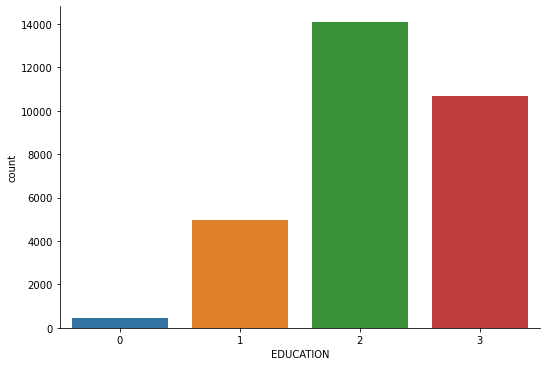

In [29]:
sns.catplot('EDUCATION', data=credit1, kind='count', aspect=1.5)

In [30]:
# 60% of transactions involve females 
credit1.groupby('SEX')['SEX'].count()

SEX
1    11984
2    18217
Name: SEX, dtype: int64

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


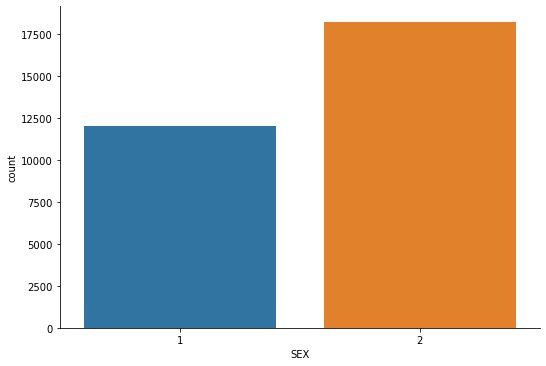

In [31]:
sns.catplot('SEX', data=credit1, kind='count', aspect=1.5)

In [32]:
# 53% of transactios involve married people, 45% singles
credit1.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13733
2    16088
3      326
Name: MARRIAGE, dtype: int64

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


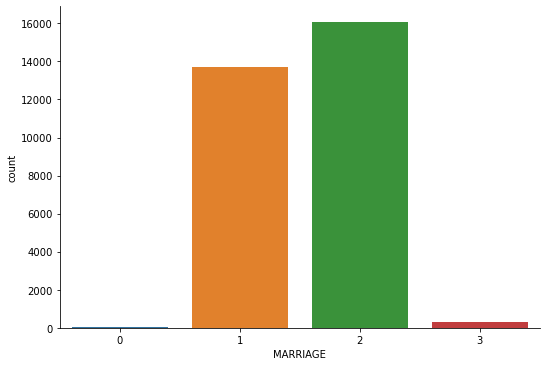

In [33]:
sns.catplot('MARRIAGE', data=credit1, kind='count', aspect=1.5)

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


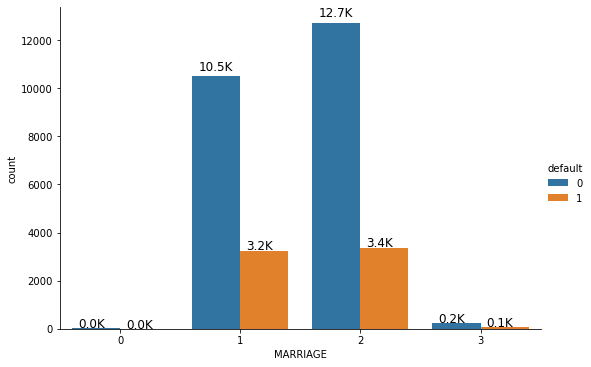

In [37]:
# 10% of married defaulted - 11% of singles defaulted
g1 = sns.catplot('MARRIAGE', data=credit1, hue='default', kind='count', aspect=1.5)
ax = g1.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.05, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')

In [34]:
# 22% of the customers in this excercise have defaulted
credit1.groupby('default')['default'].count()

default
0    23519
1     6682
Name: default, dtype: int64

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


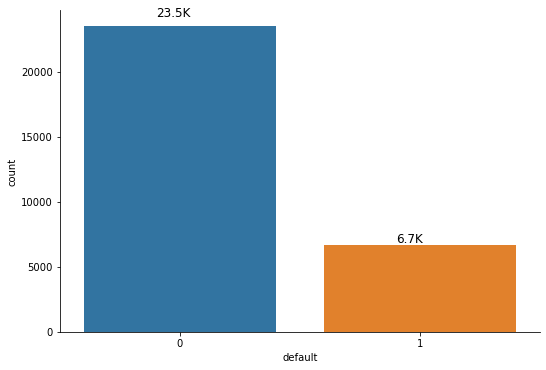

In [35]:
g4 = sns.catplot('default', data=credit1, kind='count', aspect=1.5)
ax = g4.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.3, 
            p.get_height() * 1.03, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


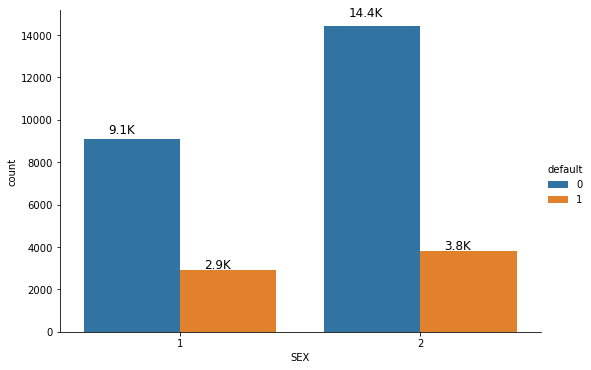

In [38]:
# 10% of men defaulted - 13% of women defaulted
g2 = sns.catplot('SEX', data=credit1, hue='default', kind='count', aspect=1.5)
ax = g2.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x()  + 0.1, 
            p.get_height() * 1.03, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


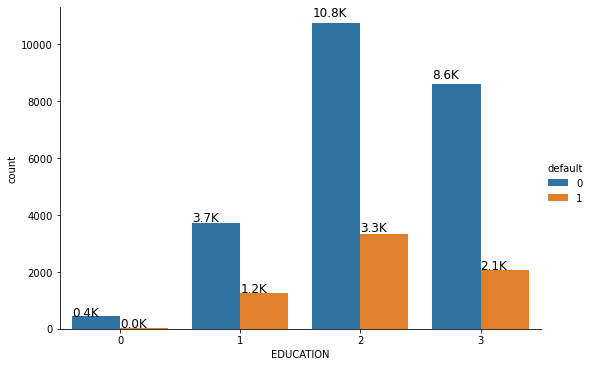

In [39]:
# 11% of people with university degrees defaulted, 7% with high school defaulted, 4% graduates defaulted
g0 = sns.catplot('EDUCATION', data=credit1, hue='default', kind='count', aspect=1.5)
ax = g0.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.0, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')

C:\Users\Francisco.Sanchez\Anaconda3\envs\UTDataScience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


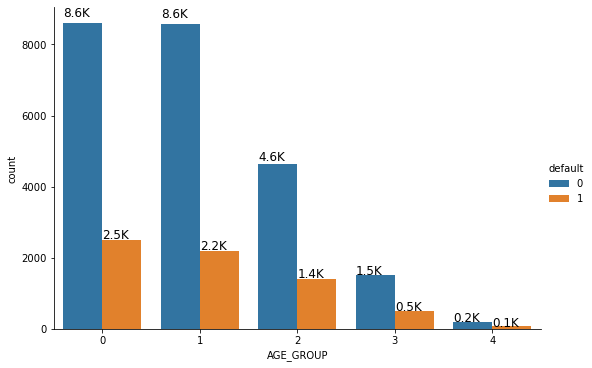

In [40]:
# majority of the customers are in between the 20s - 40s
# 8% of the 20s defaulted, 7% of the 30s defaulted & 5% of the 40s defaulted
# people in the 50s an older have a very low default percentage in this excercise with a %2 of default 
g3 = sns.catplot('AGE_GROUP', data=credit1, hue='default', kind='count', aspect=1.5)
ax = g3.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() - 0.0, 
            p.get_height() * 1.02, 
           '{0:.1f}K'.format(p.get_height()/1000),
            color='black', 
            rotation='horizontal', 
            size='large')

In [41]:
credit1.pivot_table('default', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,All
SEX,,,,,
1,14,550,1415,917,2896
2,20,697,1933,1136,3786
All,34,1247,3348,2053,6682


In [42]:
table = pd.crosstab(index=[credit1.default, credit1.MARRIAGE], columns=[credit1.SEX, credit1.EDUCATION])

In [43]:
table.unstack()

SEX        1                                        ...    2               \
EDUCATION  0              1                2        ...    1      2         
MARRIAGE   0   1   2  3   0    1    2   3  0     1  ...    2   3  0     1   
default                                             ...                     
0          0  72  83  2  10  750  670  25  1  1738  ...  800  54  4  3468   
1          0  10   4  0   2  305  232  11  0   646  ...  226  16  1  1029   

SEX                                     
EDUCATION            3                  
MARRIAGE      2   3  0     1     2   3  
default                                 
0          3221  74  3  1664  3451  17  
1           878  25  0   381   752   3  

[2 rows x 32 columns]

In [44]:
# showing default customers identity per average credit limit
pv1 = credit1.pivot_table(values='LIMIT_BAL', index=['SEX', 'MARRIAGE', 'EDUCATION'], columns=['default'], aggfunc=np.average, fill_value=0)
pv1

default                             0              1
SEX MARRIAGE EDUCATION                              
1   0        1           91000.000000  125000.000000
             2          360000.000000       0.000000
             3          300000.000000       0.000000
    1        0          215777.777778  141000.000000
             1          155040.000000  103967.213115
             2          176035.673188  124922.600619
             3          273049.808429  228680.203046
    2        0          137951.807229  102500.000000
             1          109940.298507   73352.068966
             2          121656.858307   85346.666667
             3          202340.129750  147134.502924
    3        0          125000.000000       0.000000
             1           78400.000000   48181.818182
             2           79090.909091   52105.263158
             3          153000.000000  190000.000000
2   0        1          128333.333333  100000.000000
             2          167500.000000  160000.000000
             3          160000.000000       0.000000
    1        0          197655.172414  162857.142857
             1          138616.398243  101986.754967
             2          175278.546713  126958.211856
             3          253623.798077  211784.776903
    2        0          184296.875000  116923.076923
             1          141025.000000  115221.238938
             2          156100.589879  112277.904328
             3          198316.430020  155678.191489
    3        0          176666.666667       0.000000
             1           96111.111111   41250.000000
             2          105405.405405   69600.000000
             3          197058.823529  110000.000000

In [45]:
pv2 = credit1.pivot_table(values='LIMIT_BAL', index=['AGE_GROUP'], columns=['default'], aggfunc=np.average, fill_value=0)
pv2

default,0,1
AGE_GROUP,,
0,141849.657256,99434.643144
1,207950.571229,155700.636943
2,191600.863931,141753.859275
3,169753.989362,129784.313725
4,208500.000000,186575.342466


<AxesSubplot:xlabel='AGE_GROUP'>

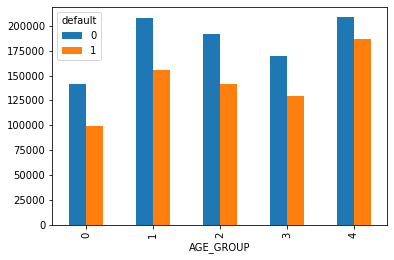

In [46]:
# customers in age group 4 spend the most, in average, they also have the lowest default %
# customers in the 20s have the lowest avg spend and the highest default %
pv2.plot(kind='bar')

In [47]:
pv3 = credit1.pivot_table(values='LIMIT_BAL', index=['AGE_GROUP'], columns=['default'], aggfunc=np.average, fill_value=0)
pv3

default,0,1
AGE_GROUP,,
0,141849.657256,99434.643144
1,207950.571229,155700.636943
2,191600.863931,141753.859275
3,169753.989362,129784.313725
4,208500.000000,186575.342466


In [48]:
# Creating new data frame, dropped unnecessary columns and created new corr matrix
df2 = credit1.drop(['0', 'ID', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1)
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE_GROUP,default
0,20000,2,2,1,0,1
1,120000,2,2,2,0,1
2,90000,2,2,2,1,0
3,50000,2,2,1,1,0
4,50000,1,2,1,3,0


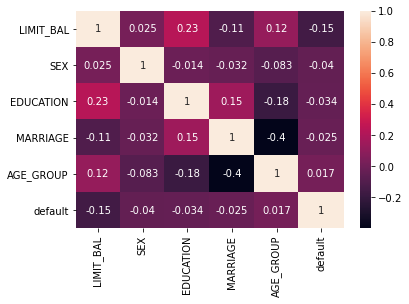

In [49]:
# no correlation for default customers
corrmat1 = df2.corr()
sns.heatmap(corrmat1, annot=True)
plt.show()